In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import calendar
import datetime

In [2]:
header = {}
data = []

with open('data.csv', 'r') as fp:
    csv_reader = csv.DictReader(fp, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            header.update(row)
        data.append(row)

In [3]:
date = data[0]['date']
date.split('-')

['2015', '01', '02']

In [4]:
years = [2015, 2016, 2017, 2018]

In [5]:
cal = calendar.Calendar()
dates = [cal.yeardatescalendar(i) for i in years]
counts = {}

for year in dates:
    for season in year:
        for month in season:
            for week in month:
                for date in week:
                    if date.year in years:
                        counts.setdefault(date, 0)

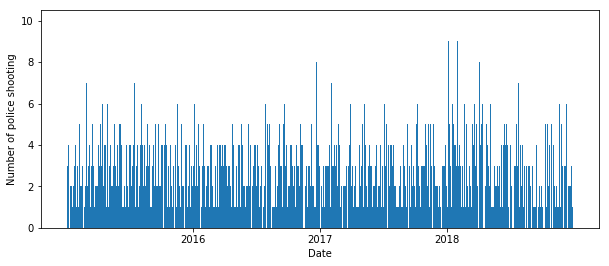

In [36]:
ds = list(counts.keys())
ds.index(datetime.date(2016, 1, 1))

plt.bar(np.arange(len(ds)), counts.values(), 1.0)
index = [ds.index(datetime.date(year, 1, 1)) for year in [2016, 2017, 2018]]
plt.xticks(index, ['2016', '2017', '2018'])
plt.xlabel('Date')
plt.ylabel('Number of police shooting')

fig = plt.gcf()
fig.set_size_inches(10, 4)

In [6]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_count = np.zeros(7)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Feb', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_count = np.zeros(12)

for row in data:
    date = row['date']
    year, month, day = date.split('-')
    year, month, day = int(year), int(month), int(day)
    if year in [2015, 2016, 2017, 2018]:
        weekday = calendar.weekday(year, month, day)
        week_count[weekday] += 1
        month_count[month - 1] += 1
        counts[datetime.date(year, month, day)] += 1

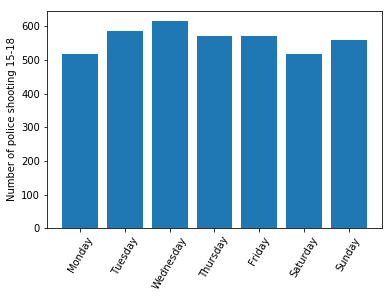

In [7]:
plt.bar(week_days, week_count, 0.8)
plt.xticks(rotation=60)
plt.ylabel('Number of police shooting 15-18')
plt.show()

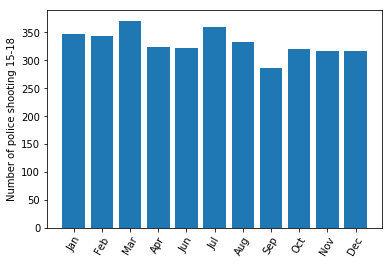

In [8]:
plt.bar(month_names, month_count, 0.8)
plt.xticks(rotation=60)
plt.ylabel('Number of police shooting 15-18')
plt.show()

In [9]:
num = np.array(list(counts.values()))
k = np.mean(num)

In [10]:
from scipy.stats import poisson

In [11]:
x = np.arange(np.max(num))
poi = poisson.pmf(x, k) * len(num)

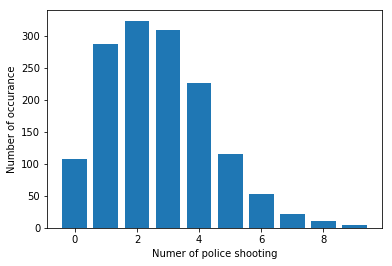

In [37]:
plt.hist(num, rwidth=0.8, align='left')
plt.xlabel(r"Numer of police shooting")
plt.ylabel(r"Number of occurance")
plt.show()